# Progress Report #3.5: [Blog-Sentiment Analysis](https://github.com/Data-Science-for-Linguists-2019/Blog-Sentiment-Analysis)

*Eva fix the link below*

This is the second part of [Progress Report #3](https://github.com/Data-Science-for-Linguists-2019/Blog-Sentiment-Analysis). I am switching Jupyter notebooks so I can do some math stuff in R. Most of this code is stolen from my Statistics Research in Linguistics professor, Dr. Melinda Fricke, and our class textbook *How to do Linguistics with R* by Dr. Natalia Levshina. 

# Loading the data again

In [5]:
# If you are trying to reproduce this - the Anaconda version of R does not come with lme4 and car installed
# install.packages("package") wasn't working for me so I used Anaconda-Navigator to install
library(ggplot2)
library(lme4)
library(car)

Loading required package: carData


In [8]:
filename = '/users/eva/Documents/Data_Science/Blog-Sentiment-Analysis/blog_sentiment_data.csv'

In [9]:
blogdata <- read.csv(file=filename, header=TRUE, sep=",")

In [11]:
dim(blogdata)

[1] 681284     11

In [12]:
summary(blogdata)

       X                id             gender            age       
 Min.   :     0   Min.   :   5114   female:336091   Min.   :13.00  
 1st Qu.:170321   1st Qu.:1239610   male  :345193   1st Qu.:17.00  
 Median :340642   Median :2607577                   Median :24.00  
 Mean   :340642   Mean   :2397802                   Mean   :23.93  
 3rd Qu.:510962   3rd Qu.:3525660                   3rd Qu.:26.00  
 Max.   :681283   Max.   :4337650                   Max.   :48.00  
                                                                   
                 industry           sign                    date       
 indUnk              :251015   Cancer : 65048   02,August,2004: 16544  
 Student             :153903   Aries  : 64979   01,August,2004: 13261  
 Technology          : 42055   Taurus : 62561   03,August,2004: 11851  
 Arts                : 32449   Libra  : 62363   05,August,2004:  9297  
 Education           : 29633   Virgo  : 60399   04,August,2004:  8661  
 Communications-Media: 2

Looks like everything loaded in correctly. (Note: `head(blogdata)` looks like a mess.)

## Analysis questions
Now that I have the polarity scores, I would like to investigate potential correlations between polarity score and industry, age, or gender. I also want to see if it's possible to predict polarity score using demographic information (hypothesis: no, but I think it's worth investigating). I realize that since I'm not dropping duplicate blogs and finding the mean for that blogger, that effects my results, but I'm going to disregard that since I don't have a ton of time. I have 3 main aims for this analysis:

+ Reveal potential relationships in the data using tables and graphs
+ Investigate correlations
+ Create a mixed effects regression model in order to discover if any of the demographic info is a significant predictor for polarity

Full disclosure, I learned how to create a mixed effects regression model yesterday. Hopefully I'm doing everything correctly.

### Looking for relationships in the data

In [19]:
aggregate(polarity_score ~ industry, data=blogdata, mean)

industry,polarity_score
Accounting,0.4645508
Advertising,0.3727675
Agriculture,0.3754881
Architecture,0.3044571
Arts,0.3376918
Automotive,0.2363101
Banking,0.2816877
Biotech,0.3018659
BusinessServices,0.3540992
Chemicals,0.2320878


Polarity scores across industry don't seem to vary substantially.

In [14]:
aggregate(polarity_score ~ age, data=blogdata, mean)

age,polarity_score
13,0.2837880
14,0.3135089
15,0.3238808
16,0.3219215
17,0.3485861
23,0.3662989
24,0.3473385
25,0.3465799
26,0.3553429
27,0.3402514


These seem to vary more substantially - but that may be do to variance in data size. Looks like everything still falls within neutral.

In [16]:
aggregate(age ~ sentiment, data=blogdata, mean)

sentiment,age
negative,23.56961
neutral,24.26917
positive,23.87969


Neutral blogs have slightly older bloggers.

In [18]:
aggregate(polarity_score ~ gender, data=blogdata, mean)

gender,polarity_score
female,0.3664453
male,0.3173169


Female bloggers have slightly higher polarity scores, though both fall within the neutral range.

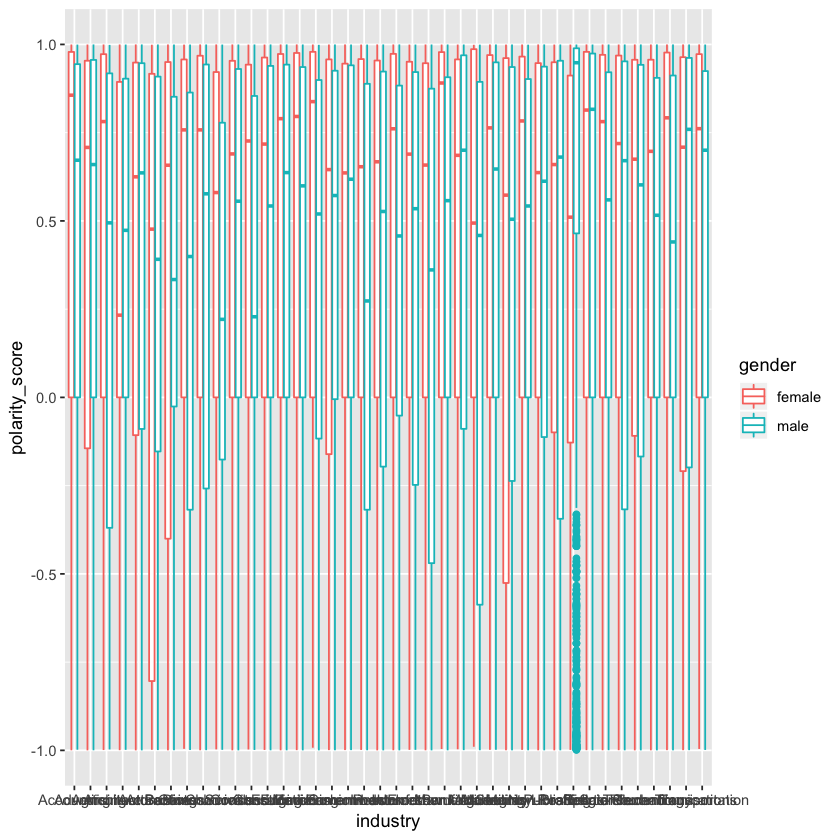

In [21]:
ggplot(blogdata, aes(industry, polarity_score, color=gender)) + geom_boxplot() 

For the purpose of data visualization, I'm going to create a subset with only the top 10 industries (excluding indUnk).

In [26]:
subset(blogdata, industry=='Student' | industry=='Technology' | industry=='Arts' | industry=='Education' 
       | industry=='Communications-Media' | industry=='Internet' | industry=='Non-Profit' 
       | industry=='Engineering' | industry=='Law' | industry=='Publishing') -> blogdata.subset

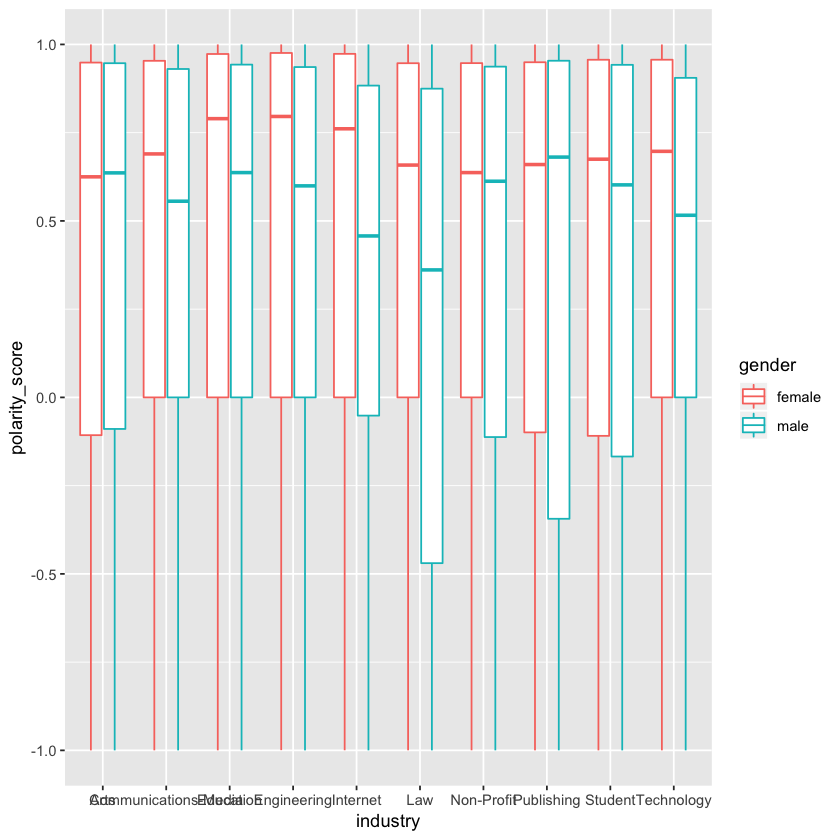

In [27]:
ggplot(blogdata.subset, aes(industry, polarity_score, color=gender)) + geom_boxplot() 

No obvious differences, except men who work in Law and Publishing seem to be more negative than women in those same fields.

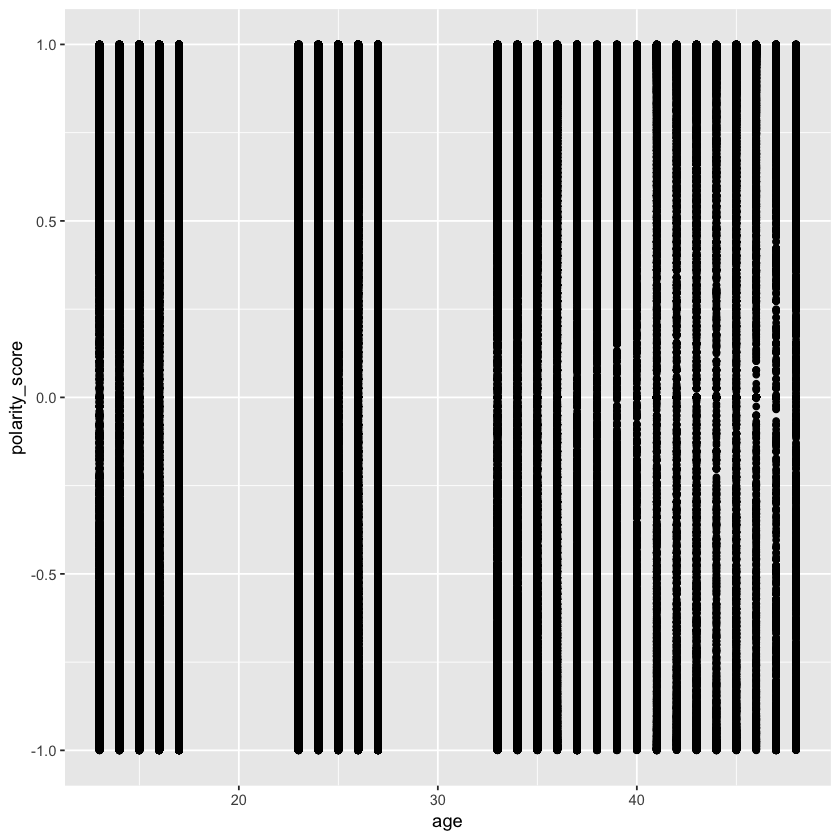

In [29]:
ggplot(blogdata, aes(age, polarity_score)) + geom_point()

Well, this is not helpful. Let's try correlations.

### Looking for relationships in the data
Let's try some correlagrams.

In [30]:
library(corrgram)

ERROR: Error in library(corrgram): there is no package called ‘corrgram’
